In [1]:
from psf_constants import TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          PSF_TRAIN_FILE_SUFFIXES, \
                          NUMPY_SUFFIX, \
                          TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH
                          

from data_utils import generate_zernike_psf_complex_fields, generate_psf_complex_fields, compute_output_fluxes_from_complex_field

In [4]:
PATHS_DICTIONARY = {
    "TR2": [TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
            TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            [2, 3]],
    "V2": [VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           VALIDATION_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
           [2, 3]],
    "TS2": [TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            [2, 3]],
    "TR5": [TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
            TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            [2, 3, 4, 5, 6]],
    "V5": [VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           VALIDATION_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
           [2, 3, 4, 5, 6]],
    "TS5": [TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            [2, 3, 4, 5, 6]],
    "TR9": [TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
            TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            [2, 3, 4, 5, 6, 7, 8, 9, 10]],
    "V9": [VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           VALIDATION_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
           [2, 3, 4, 5, 6, 7, 8, 9, 10]],
    "TS9": [TEST_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            TEST_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            [2, 3, 4, 5, 6, 7, 8, 9, 10]],
    "TR14": [TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
             TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
             [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
    "V14": [VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            VALIDATION_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
            [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
    "TS14": [TEST_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
             TEST_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
             [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]],
    "TR20": [TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
             TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
             [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17 , 18, 19, 20, 21]],
    "V20": [VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            VALIDATION_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
            [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17 , 18, 19, 20, 21]],
    "TS20": [TEST_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
             TEST_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
             [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17 , 18, 19, 20, 21]],
}

# Train data

In [ ]:
for dataset_name, ds_info in PATHS_DICTIONARY.items():
    print(f"Generating {dataset_name}")
    psf_path = ds_info[0]
    flux_path = ds_info[1]
    zernike_modes = len(ds_info[2])
    print(psf_path)
    print(flux_path)
    print(ds_info[2])
    
    if dataset_name.startswith("TR"):
        for fnumber in PSF_TRAIN_FILE_SUFFIXES:
            print("Generating PSFs")
            print(f"Train Subfile {fnumber}")
            complex_fields_filepath = f"{psf_path}{fnumber}{NUMPY_SUFFIX}"
            generate_zernike_psf_complex_fields(complex_fields_filepath, 
                                                zernike_modes=zernike_modes)
            print("Generating Fluxes")
            output_fluxes_filepath = f"{flux_path}{fnumber}{NUMPY_SUFFIX}"
            compute_output_fluxes_from_complex_field(complex_fields_filepath, 
                                                     output_fluxes_filepath)
    else:
        print("Generating PSFs")
        generate_zernike_psf_complex_fields(psf_path, 
                                            zernike_modes=zernike_modes)
        print("Generating Fluxes")
        compute_output_fluxes_from_complex_field(psf_path, 
                                                 flux_path)

Generating TR2
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TrainData/2M_zernike_complex_fields
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/2M_zernike_output_fluxes
[2, 3]
Generating PSFs
Train Subfile 00
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TrainData/2M_zernike_complex_fields00.npy already exists
Generating Fluxes
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/2M_zernike_output_fluxes00.npy already exists
Generating PSFs
Train Subfile 01
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TrainData/2M_zernike_complex_fields01.npy already exists
Generating Fluxes
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/2M_zernike_output_fluxes01.npy already exists


Creating  2
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


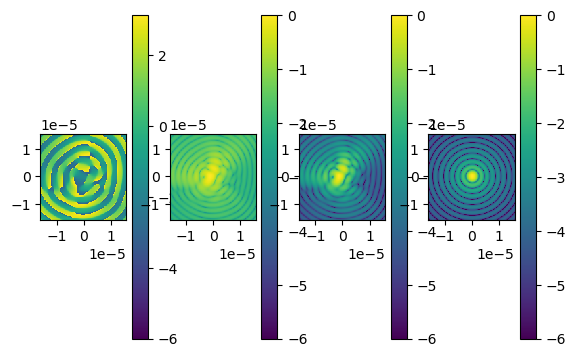

In [9]:
from data_utils import generate_zernike_psf_complex_fields
from plot_utils import plot_amplitude_phase_intensity
import numpy as np

for i in PATHS_DICTIONARY.values():
    name = i[1]
    c = len(i[2])
    v = np.load(name)
    plot_amplitude_phase_intensity(v[0], title=f"{c} modes", log_scale=True)

/tmp/ipykernel_45098/505618585.py:33: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.
  aperture = hcipy.circular_aperture(D_tel)(pupil_grid)


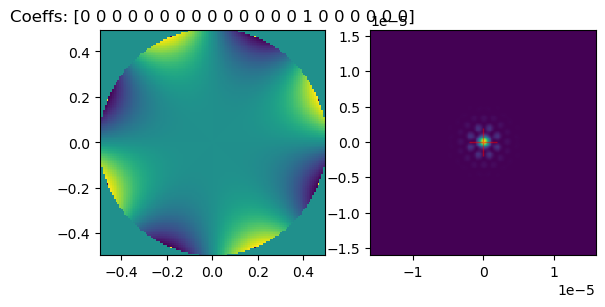

In [1]:
import hcipy

import numpy as np

import matplotlib.pyplot as plt





# Pick some Zernike mode coefficients

mode_coeffs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0])



# Set up hcipy optical system

n_px = 128

nmodes = 21

D_tel = 1 # meter

wavelength = 1e-6 # meter

pupil_grid = hcipy.make_pupil_grid(n_px, D_tel)

focal_grid = hcipy.make_focal_grid_from_pupil_grid(pupil_grid, 8, 16, wavelength=wavelength)

prop = hcipy.FraunhoferPropagator(pupil_grid, focal_grid)

aperture = hcipy.circular_aperture(D_tel)(pupil_grid)



# Compute the Zernike polynomials

zern_basis = hcipy.mode_basis.make_zernike_basis(num_modes=nmodes, D=D_tel, grid=pupil_grid)



# Make wavefront phase from some linear combination of Zernike modes, as per given coefficients

phase_pupil = zern_basis.linear_combination(mode_coeffs)



# Set the pupil to this, and propagate to image

complex_pupil = aperture * np.exp(1j*phase_pupil)

wf = hcipy.Wavefront(complex_pupil, wavelength)

img = prop(wf)



# Plot the results

plt.figure(1)

plt.clf()

plt.subplot(121)

plt.title('Coeffs: '+np.array2string(mode_coeffs))

hcipy.imshow_field(wf.phase)

plt.subplot(122)

hcipy.imshow_field(img.intensity)

plt.plot(0,0,'+r', markersize=20, alpha=0.5)